# Python- Pandas Library

In [1]:
#pip install pandas
import pandas as pd

In [2]:
pd?

In [3]:
help(pd.Series)

Help on class Series in module pandas.core.series:

class Series(pandas.core.base.IndexOpsMixin, pandas.core.generic.NDFrame)
 |  Series(data=None, index=None, dtype: 'Dtype | None' = None, name=None, copy: 'bool' = False, fastpath: 'bool' = False)
 |  
 |  One-dimensional ndarray with axis labels (including time series).
 |  
 |  Labels need not be unique but must be a hashable type. The object
 |  supports both integer- and label-based indexing and provides a host of
 |  methods for performing operations involving the index. Statistical
 |  methods from ndarray have been overridden to automatically exclude
 |  missing data (currently represented as NaN).
 |  
 |  Operations between Series (+, -, /, \*, \*\*) align values based on their
 |  associated index values-- they need not be the same length. The result
 |  index will be the sorted union of the two indexes.
 |  
 |  Parameters
 |  ----------
 |  data : array-like, Iterable, dict, or scalar value
 |      Contains data stored in 

In [ ]:
pd.Series?

In [4]:
data = [1,2,3,4,5,"AC"]
srs1 = pd.Series(data)
print(srs1)
print(srs1[0:4])

0     1
1     2
2     3
3     4
4     5
5    AC
dtype: object
0    1
1    2
2    3
3    4
dtype: object


In [ ]:
srs = pd.Series(data, index=['a','b','c','d','e','f'])
print(srs)
print(srs['a':'c'])
print(srs[:])

In [ ]:
data_dct = {'Name':['AC','BD'],'Salary':[10,20]}
srs = pd.Series(data_dct)

srs['Name']

In [ ]:
pd.DataFrame?

In [5]:
data = {"a":["apple","mango"],"b":[10,12]}
df = pd.DataFrame(data)
df

,a,b
0,apple,10
1,mango,12


In [6]:
df["Fruit_Name"] = df["a"]
df["Count"] = df["b"]
df["Count^2"] = df["Count"]**2
df["Diff"] = df["Count^2"] - df["b"]
df

,a,b,Fruit_Name,Count,Count^2,Diff
0,apple,10,apple,10,100,90
1,mango,12,mango,12,144,132


In [ ]:
df.rename(index = {0:"a",1:"b",2:"c"}, inplace=True)
df.rename(columns = {"Count^2":"MyWish","a":"Fruit_Name1"},inplace=True)
df

In [ ]:
df.drop(['Fruit_Name1','b'],axis=1,inplace=True)  ## Delete Column ==> axis =1 
df.drop(['a'],axis=0,inplace=True) ## Delete Rows axis ==> 0

In [ ]:
df

In [ ]:
type(df)

In [ ]:
empty_dataframe = pd.DataFrame()
type(empty_dataframe)

In [ ]:
lst = [['Apple', 10], ['Mango',20]]
df = pd.DataFrame(lst, columns = ["Fruit_name", "Price"])
df

In [ ]:
df['Price']*1.1

In [3]:
df = pd.DataFrame({"A":[1,2,3],"B":[2,3,4],"E":[3,4,5]})
df

,A,B,E
0,1,2,3
1,2,3,4
2,3,4,5


In [4]:
df1 = pd.DataFrame({"A":[3,4],"C":[1,9]})
df1

,A,C
0,3,1
1,4,9


In [5]:
df2 = pd.DataFrame({"S":[3,4,5],"C":[1,9,10]})
df2

,S,C
0,3,1
1,4,9
2,5,10


In [6]:
pd.concat([df,df1])

,A,B,E,C
0,1,2.0,3.0,NaN
1,2,3.0,4.0,NaN
2,3,4.0,5.0,NaN
0,3,NaN,NaN,1.0
1,4,NaN,NaN,9.0


In [7]:
pd.concat?

Signature:
pd.concat(
    objs: 'Iterable[NDFrame] | Mapping[Hashable, NDFrame]',
    axis: 'Axis' = 0,
    join: 'str' = 'outer',
    ignore_index: 'bool' = False,
    keys=None,
    levels=None,
    names=None,
    verify_integrity: 'bool' = False,
    sort: 'bool' = False,
    copy: 'bool' = True,
) -> 'DataFrame | Series'
Docstring:
Concatenate pandas objects along a particular axis with optional set logic
along the other axes.

Can also add a layer of hierarchical indexing on the concatenation axis,
which may be useful if the labels are the same (or overlapping) on
the passed axis number.

Parameters
----------
objs : a sequence or mapping of Series or DataFrame objects
    If a mapping is passed, the sorted keys will be used as the `keys`
    argument, unless it is passed, in which case the values will be
    selected (see below). Any None objects will be dropped silently unless
    they are all None in which case a ValueError will be raised.
axis : {0/'index', 1/'columns'}, defa

In [8]:
sf = pd.concat([df,df1],axis=1,join="inner")

In [9]:
sf

,A,B,E,A,C
0,1,2,3,3,1
1,2,3,4,4,9


In [10]:
pd.concat([df,df1],axis=1,join="outer")

,A,B,E,A,C
0,1,2,3,3.0,1.0
1,2,3,4,4.0,9.0
2,3,4,5,NaN,NaN


In [11]:
pd.concat([df,df1],axis=0,join="outer")

,A,B,E,C
0,1,2.0,3.0,NaN
1,2,3.0,4.0,NaN
2,3,4.0,5.0,NaN
0,3,NaN,NaN,1.0
1,4,NaN,NaN,9.0


In [14]:
pd.concat([df,df1],axis=0,join="inner").reset_index(drop=True)

,A
0,1
1,2
2,3
3,3
4,4


In [15]:
df

,A,B,E
0,1,2,3
1,2,3,4
2,3,4,5


In [16]:
df1

,A,C
0,3,1
1,4,9


In [17]:
df2

,S,C
0,3,1
1,4,9
2,5,10


In [18]:
fd = pd.merge(df,df1,on=["A"],how="inner")
fd

,A,B,E,C
0,3,4,5,1


In [20]:
pd.merge(df,df1,on=["A"],how="right")

,A,B,E,C
0,3,4.0,5.0,1
1,4,NaN,NaN,9


In [21]:
pd.merge(df,df1,on=["A"],how="left")

,A,B,E,C
0,1,2,3,NaN
1,2,3,4,NaN
2,3,4,5,1.0


In [22]:
pd.merge(df,df1,on=["A"],how="outer")

,A,B,E,C
0,1,2.0,3.0,NaN
1,2,3.0,4.0,NaN
2,3,4.0,5.0,1.0
3,4,NaN,NaN,9.0


In [23]:
df2

,S,C
0,3,1
1,4,9
2,5,10


In [24]:
df1

,A,C
0,3,1
1,4,9


In [29]:
df3 = pd.DataFrame({"S":[3,4,5], "D":[7,6,5]})

In [25]:
fd = pd.merge(df2,df1,left_on=["S"],right_on=["A"],how="inner")
fd

,S,C_x,A,C_y
0,3,1,3,1
1,4,9,4,9


In [27]:
fd = pd.merge(df2,df1,left_on=["S"],right_on=["A"],how="left")
fd

,S,C_x,A,C_y
0,3,1,3.0,1.0
1,4,9,4.0,9.0
2,5,10,NaN,NaN


In [28]:
pd.merge(df2,df1,left_on=["S"],right_on=["A"],how="right")

,S,C_x,A,C_y
0,3,1,3,1
1,4,9,4,9


In [34]:
fd = pd.merge(df3,df1,left_on=["S"],right_on=["A"],how="right")

,S,D,A,C
0,3,7,3,1
1,4,6,4,9


In [35]:
pd.merge(fd, df)

,S,C_x,A,C_y,B,E
0,3,1,3.0,1.0,4,5


# Dataset Import

Here we are going to import our dataset.

In [36]:
import os
from pathlib import Path
#read dataset and store into a dataframe
cwd = os.getcwd()

In [37]:
cars=pd.read_csv(Path(cwd, 'mtcars.csv'))

In [43]:
cars.head(7)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4


In [38]:
type(cars)

pandas.core.frame.DataFrame

In [44]:
cars.tail(8)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
24,Pontiac Firebird,19.2,8,400.0,175,3.08,3.845,17.05,0,0,3,2
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
26,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.50,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.50,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.60,1,1,4,2


In [45]:
cars.dtypes

Unnamed: 0     object
mpg           float64
cyl             int64
disp          float64
hp              int64
drat          float64
wt            float64
qsec          float64
vs              int64
am              int64
gear            int64
carb            int64
dtype: object

In [46]:
cars["qsec"] = cars["qsec"].astype(str)

In [47]:
cars["qsec"].dtype

dtype('O')

In [48]:
cars.qsec

0     16.46
1     17.02
2     18.61
3     19.44
4     17.02
5     20.22
6     15.84
7      20.0
8      22.9
9      18.3
10     18.9
11     17.4
12     17.6
13     18.0
14    17.98
15      nan
16      nan
17      nan
18      nan
19     19.9
20    20.01
21    16.87
22     17.3
23    15.41
24    17.05
25     18.9
26     16.7
27     16.9
28     14.5
29     15.5
30     14.6
31     18.6
Name: qsec, dtype: object

In [49]:
cars["qsec"] = cars["qsec"].astype(float)

In [50]:
cars["qsec"].dtype

dtype('float64')

In [51]:
ls = cars.shape
ls

(32, 12)

In [52]:
ls[0] # Number of Rows

32

In [53]:
ls[1] # Number of Columns

12

In [56]:
df = pd.read_csv(Path(cwd, "test.txt"),sep="|", names = ["Emp Id","Designation","Department","Experience"])
df

,Emp Id,Designation,Department,Experience
0,1,Abhishek,Data Engineering,10
1,2,Anamika,Data Science,15
2,3,Sohail,Testing,12
3,4,Ashish,SDE,4
4,5,Sunaina,Data Engineering,8


In [62]:
df = pd.read_excel(Path(cwd, 'cars.xlsx'), sheet_name="cars2")
df

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


# Analysis

After importing the dataset we are all set to perform different analysis.

In [ ]:
#check the type
type(cars)

In [ ]:
#view only the first five records
cars.head()

In [ ]:
#view only the first ten records
cars.head(10)

In [ ]:
#view only the last five records
cars.tail()

In [ ]:
#view only the last ten records
cars.tail(10)

In [ ]:
#view number of rows and columns in the dataframe
cars.shape

In [ ]:
#print a concise summary of the columns
cars.info()

In [ ]:
#mean
cars.mean()

In [ ]:
#median
cars["mpg"].median()

In [ ]:
#standard deviation
cars.std()

In [ ]:
#maximum of each attribute
cars.max()

In [ ]:
#minimum of each attribute
cars.min()

In [ ]:
#number of non-null records in each column
cars.count()

In [ ]:
#descriptive statistics summary
cars.describe()

In [ ]:
cars.corr()

# Cleaning 

After analysing we have realized that our dataset is not perfect, some column names are irrelevant, there are a few missing data, some column has important data but cant perform some operation because they are of string type. So now with the help of PAndas we will be cleaning or in other words we will be making our data perfect to perform further operations.

In [63]:
cars

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [65]:
#rename column
cars.rename(columns={'Unnamed: 0':'model'}, inplace=True)
cars

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [66]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    28 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [67]:
missing_cols = cars.isnull().sum()

In [70]:
cars.isnull()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False


In [68]:
missing_cols

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     4
vs       0
am       0
gear     0
carb     0
dtype: int64

In [72]:
cars["qsec"]=cars["qsec"].fillna(cars["qsec"].median())

In [73]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [74]:
cars.isnull().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

In [ ]:
cars["mpg"]

In [ ]:
cars["mpg"] = cars["mpg"].astype(object)

In [ ]:
cars["mpg"] = cars["mpg"].astype(float)

In [ ]:
cars.info()

In [79]:
cars["model1"] = cars["model"]*2

In [76]:
cars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,model1
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Mazda RX4Mazda RX4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Mazda RX4 WagMazda RX4 Wag
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Datsun 710Datsun 710
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Hornet 4 DriveHornet 4 Drive
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,Hornet SportaboutHornet Sportabout


In [80]:
#drop unwanted column
cars.drop(columns=['model1'], inplace=True)

In [ ]:
#find correlation matrix
df=cars.corr()
df

In [82]:
cars.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.327729,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.538027,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.381319,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.655297,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.018883,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.119365,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.327729,-0.538027,-0.381319,-0.655297,0.018883,-0.119365,1.000000,0.699103,-0.295224,-0.235223,-0.620062
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.699103,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.295224,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.235223,0.206023,0.794059,1.000000,0.274073


In [84]:
#Again find the correlation including mpg
df=cars[['mpg', 'cyl','disp','hp','drat','wt','qsec','vs','am','gear','carb']].corr()
df

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.327729,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.538027,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.381319,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.655297,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.018883,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.119365,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.327729,-0.538027,-0.381319,-0.655297,0.018883,-0.119365,1.000000,0.699103,-0.295224,-0.235223,-0.620062
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.699103,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.295224,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.235223,0.206023,0.794059,1.000000,0.274073


In [83]:
cars[['mpg', 'cyl','disp','hp','drat','wt','qsec','vs','am','gear']]

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3
5,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3
6,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3
7,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4
8,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4
9,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4


In [85]:
cars.mean()

/tmp/ipykernel_759/1764053374.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cars.mean()


mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.747813
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

In [86]:
cars.median()

/tmp/ipykernel_759/2356643283.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  cars.median()


mpg      19.200
cyl       6.000
disp    196.300
hp      123.000
drat      3.695
wt        3.325
qsec     17.500
vs        0.000
am        0.000
gear      4.000
carb      2.000
dtype: float64

In [87]:
cars.min()

model    AMC Javelin
mpg             10.4
cyl                4
disp            71.1
hp                52
drat            2.76
wt             1.513
qsec            14.5
vs                 0
am                 0
gear               3
carb               1
dtype: object

In [88]:
cars.max()

model    Volvo 142E
mpg            33.9
cyl               8
disp          472.0
hp              335
drat           4.93
wt            5.424
qsec           22.9
vs                1
am                1
gear              5
carb              8
dtype: object

In [102]:
res = {}

for col in cars.columns:
    res[col] = cars[col].isnull().sum()
    
res

{'model': 0,
 'mpg': 0,
 'cyl': 0,
 'disp': 0,
 'hp': 0,
 'drat': 0,
 'wt': 0,
 'qsec': 0,
 'vs': 0,
 'am': 0,
 'gear': 0,
 'carb': 0}

Now from the correlation we can see lowest correlation is between "am" and "carb". So when we will taking "carb" as reference for any analysis we can drop "am", since it will not add any change or value to the analysis. In the same way we can drop "carb" column while taking "am" as reference for any analysis.

# Manipluation

Sometimes we don't need the whole dataset for analysis and cut them in small chunks, sometimes we need to arrange them in an certain order(ascending or descending), sometimes we may need to set a certain value to a column or apply a function to a column, sometmes we may also need to apply filters to our dataset---all of these comes under Pandas Data Manipulation. 

# Indexing by position

In [89]:
#view hp column only
#cars[:,1:2]
cars.iloc[:5,:6]

,model,mpg,cyl,disp,hp,drat
0,Mazda RX4,21.0,6,160.0,110,3.90
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90
2,Datsun 710,22.8,4,108.0,93,3.85
3,Hornet 4 Drive,21.4,6,258.0,110,3.08
4,Hornet Sportabout,18.7,8,360.0,175,3.15


In [90]:
#first five records of hp column
cars.iloc[0:5,4]

0    110
1    110
2     93
3    110
4    175
Name: hp, dtype: int64

In [91]:
#all rows, all columns
cars.iloc[:,:]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [92]:
#for attributes from disp to carb see all the records from index 6
cars.iloc[6:,4:]

,hp,drat,wt,qsec,vs,am,gear,carb
6,245,3.21,3.570,15.84,0,0,3,4
7,62,3.69,3.190,20.00,1,0,4,2
8,95,3.92,3.150,22.90,1,0,4,2
9,123,3.92,3.440,18.30,1,0,4,4
10,123,3.92,3.440,18.90,1,0,4,4
11,180,3.07,4.070,17.40,0,0,3,3
12,180,3.07,3.730,17.60,0,0,3,3
13,180,3.07,3.780,18.00,0,0,3,3
14,205,2.93,5.250,17.98,0,0,3,4
15,215,3.00,5.424,17.50,0,0,3,4


In [93]:
#Now we want to look at all the rows and only the first column
cars.iloc[:,1]

0     21.0
1     21.0
2     22.8
3     21.4
4     18.7
5     18.1
6     14.3
7     24.4
8     22.8
9     19.2
10    17.8
11    16.4
12    17.3
13    15.2
14    10.4
15    10.4
16    14.7
17    32.4
18    30.4
19    33.9
20    21.5
21    15.5
22    15.2
23    13.3
24    19.2
25    27.3
26    26.0
27    30.4
28    15.8
29    19.7
30    15.0
31    21.4
Name: mpg, dtype: float64

In [94]:
cars.iloc?

Type:        property
String form: <property object at 0x7f3254660130>
Docstring:  
Purely integer-location based indexing for selection by position.

``.iloc[]`` is primarily integer position based (from ``0`` to
``length-1`` of the axis), but may also be used with a boolean
array.

Allowed inputs are:

- An integer, e.g. ``5``.
- A list or array of integers, e.g. ``[4, 3, 0]``.
- A slice object with ints, e.g. ``1:7``.
- A boolean array.
- A ``callable`` function with one argument (the calling Series or
  DataFrame) and that returns valid output for indexing (one of the above).
  This is useful in method chains, when you don't have a reference to the
  calling object, but would like to base your selection on some value.

``.iloc`` will raise ``IndexError`` if a requested indexer is
out-of-bounds, except *slice* indexers which allow out-of-bounds
indexing (this conforms with python/numpy *slice* semantics).

See more at :ref:`Selection by Position <indexing.integer>`.

See Also
------

In [ ]:
help(cars.iloc)

# Indexing by label

In [ ]:
#see all the record of mpg column
cars.loc[:,"mpg"]

In [95]:
#display the records from index 0 to index 6 from mpg column
cars.loc[:6,"mpg"]

0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
5    18.1
6    14.3
Name: mpg, dtype: float64

In [96]:
#see the first 7 records from mpg to qsec column
cars.loc[:6,"mpg":"qsec"]

,mpg,cyl,disp,hp,drat,wt,qsec
0,21.0,6,160.0,110,3.90,2.620,16.46
1,21.0,6,160.0,110,3.90,2.875,17.02
2,22.8,4,108.0,93,3.85,2.320,18.61
3,21.4,6,258.0,110,3.08,3.215,19.44
4,18.7,8,360.0,175,3.15,3.440,17.02
5,18.1,6,225.0,105,2.76,3.460,20.22
6,14.3,8,360.0,245,3.21,3.570,15.84


# Feature Engg Using Pandas

In [107]:
cars['am']= cars["hp"]*cars["gear"]
cars

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,brand,remaining
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,440,4,4,Mazda,RX4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,440,4,4,Mazda,RX4 Wag
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,372,4,1,Datsun,710
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,330,3,1,Hornet,4 Drive
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,525,3,2,Hornet,Sportabout
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,315,3,1,Valiant,None
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,735,3,4,Duster,360
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,248,4,2,Merc,240D
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,380,4,2,Merc,230
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,492,4,4,Merc,280


In [110]:
#double up records in 'am' using lambda fxn
f = lambda x: x**2
cars['2am'] = cars['am'].apply(f)
cars['2mpg'] = cars['mpg'].apply(f)
cars

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,brand,remaining,2am,2mpg
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,440,4,4,Mazda,RX4,193600,441.00
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,440,4,4,Mazda,RX4 Wag,193600,441.00
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,372,4,1,Datsun,710,138384,519.84
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,330,3,1,Hornet,4 Drive,108900,457.96
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,525,3,2,Hornet,Sportabout,275625,349.69
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,315,3,1,Valiant,None,99225,327.61
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,735,3,4,Duster,360,540225,204.49
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,248,4,2,Merc,240D,61504,595.36
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,380,4,2,Merc,230,144400,519.84
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,492,4,4,Merc,280,242064,368.64


In [111]:
cars['test'] = cars['am']**2

In [115]:
cars[["brand", "model_name"]] = cars["model"].str.split(" ", 1, expand =True)

In [126]:
cars["test"] = cars["model"].str.split(" ", 1, expand =False)

In [127]:
cars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,brand,model_name,test
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,440,4,4,MAZDA,RX4,"[Mazda, RX4]"
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,440,4,4,MAZDA,RX4 Wag,"[Mazda, RX4 Wag]"
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,372,4,1,DATSUN,710,"[Datsun, 710]"
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,330,3,1,HORNET,4 Drive,"[Hornet, 4 Drive]"
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,525,3,2,HORNET,Sportabout,"[Hornet, Sportabout]"


In [125]:
pd.Series.str.split?

Signature:
pd.Series.str.split(
    self,
    pat: 'str | re.Pattern | None' = None,
    n=-1,
    expand=False,
    *,
    regex: 'bool | None' = None,
)
Docstring:
Split strings around given separator/delimiter.

Splits the string in the Series/Index from the beginning,
at the specified delimiter string.

Parameters
----------
pat : str or compiled regex, optional
    String or regular expression to split on.
    If not specified, split on whitespace.
n : int, default -1 (all)
    Limit number of splits in output.
    ``None``, 0 and -1 will be interpreted as return all splits.
expand : bool, default False
    Expand the split strings into separate columns.

    - If ``True``, return DataFrame/MultiIndex expanding dimensionality.
    - If ``False``, return Series/Index, containing lists of strings.

regex : bool, default None
    Determines if the passed-in pattern is a regular expression:

    - If ``True``, assumes the passed-in pattern is a regular expression
    - If ``False``, t

In [120]:
cars["brand"]=cars["brand"].str.upper()

In [121]:
cars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,brand,model_name
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,440,4,4,MAZDA,RX4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,440,4,4,MAZDA,RX4 Wag
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,372,4,1,DATSUN,710
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,330,3,1,HORNET,4 Drive
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,525,3,2,HORNET,Sportabout


In [118]:
cars.drop(columns = ["2am","test","2mpg","remaining"], inplace=True)

In [122]:
cars.shape

(32, 14)

# Sorting

In [128]:
#sorting cyl column ascending order
cars.sort_values(by=['cyl','hp'],ascending=False)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,brand,model_name,test
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.60,0,1675,5,8,MASERATI,Bora,"[Maserati, Bora]"
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.50,0,1320,5,4,FORD,Pantera L,"[Ford, Pantera L]"
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,735,3,4,DUSTER,360,"[Duster, 360]"
23,Camaro Z28,13.3,8,350.0,245,3.73,3.840,15.41,0,735,3,4,CAMARO,Z28,"[Camaro, Z28]"
16,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.50,0,690,3,4,CHRYSLER,Imperial,"[Chrysler, Imperial]"
15,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.50,0,645,3,4,LINCOLN,Continental,"[Lincoln, Continental]"
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,615,3,4,CADILLAC,Fleetwood,"[Cadillac, Fleetwood]"
11,Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,540,3,3,MERC,450SE,"[Merc, 450SE]"
12,Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,540,3,3,MERC,450SL,"[Merc, 450SL]"
13,Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,540,3,3,MERC,450SLC,"[Merc, 450SLC]"


In [130]:
cars.sort_values(by=['cyl'],ascending=True)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,brand,model_name,test
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.60,1,436,4,2,VOLVO,142E,"[Volvo, 142E]"
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,372,4,1,DATSUN,710,"[Datsun, 710]"
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,565,5,2,LOTUS,Europa,"[Lotus, Europa]"
26,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,455,5,2,PORSCHE,914-2,"[Porsche, 914-2]"
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,264,4,1,FIAT,X1-9,"[Fiat, X1-9]"
20,Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,291,3,1,TOYOTA,Corona,"[Toyota, Corona]"
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,248,4,2,MERC,240D,"[Merc, 240D]"
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,380,4,2,MERC,230,"[Merc, 230]"
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,260,4,1,TOYOTA,Corolla,"[Toyota, Corolla]"
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,17.50,1,208,4,2,HONDA,Civic,"[Honda, Civic]"


In [131]:
cars.sort_values(by=['hp'],ascending=True).reset_index(drop=True)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,brand,model_name,test
0,Honda Civic,30.4,4,75.7,52,4.93,1.615,17.50,1,208,4,2,HONDA,Civic,"[Honda, Civic]"
1,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,248,4,2,MERC,240D,"[Merc, 240D]"
2,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,260,4,1,TOYOTA,Corolla,"[Toyota, Corolla]"
3,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,264,4,1,FIAT,X1-9,"[Fiat, X1-9]"
4,Fiat 128,32.4,4,78.7,66,4.08,2.200,17.50,1,264,4,1,FIAT,128,"[Fiat, 128]"
5,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,455,5,2,PORSCHE,914-2,"[Porsche, 914-2]"
6,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,372,4,1,DATSUN,710,"[Datsun, 710]"
7,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,380,4,2,MERC,230,"[Merc, 230]"
8,Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,291,3,1,TOYOTA,Corona,"[Toyota, Corona]"
9,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,315,3,1,VALIANT,None,[Valiant]


In [132]:
cars["hp"].sort_values()

18     52
7      62
19     65
25     66
17     66
26     91
2      93
8      95
20     97
5     105
31    109
0     110
1     110
3     110
27    113
10    123
9     123
21    150
22    150
29    175
24    175
4     175
12    180
13    180
11    180
14    205
15    215
16    230
23    245
6     245
28    264
30    335
Name: hp, dtype: int64

# Filtering

In [135]:
cars['cyl'] > 6

0     False
1     False
2     False
3     False
4      True
5     False
6      True
7     False
8     False
9     False
10    False
11     True
12     True
13     True
14     True
15     True
16     True
17    False
18    False
19    False
20    False
21     True
22     True
23     True
24     True
25    False
26    False
27    False
28     True
29    False
30     True
31    False
Name: cyl, dtype: bool

In [137]:
cars[cars['cyl'] > 6].reset_index(drop=True)

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,brand,model_name,test
0,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,525,3,2,HORNET,Sportabout,"[Hornet, Sportabout]"
1,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,735,3,4,DUSTER,360,"[Duster, 360]"
2,Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,540,3,3,MERC,450SE,"[Merc, 450SE]"
3,Merc 450SL,17.3,8,275.8,180,3.07,3.730,17.60,0,540,3,3,MERC,450SL,"[Merc, 450SL]"
4,Merc 450SLC,15.2,8,275.8,180,3.07,3.780,18.00,0,540,3,3,MERC,450SLC,"[Merc, 450SLC]"
5,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,615,3,4,CADILLAC,Fleetwood,"[Cadillac, Fleetwood]"
6,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.50,0,645,3,4,LINCOLN,Continental,"[Lincoln, Continental]"
7,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.50,0,690,3,4,CHRYSLER,Imperial,"[Chrysler, Imperial]"
8,Dodge Challenger,15.5,8,318.0,150,2.76,3.520,16.87,0,450,3,2,DODGE,Challenger,"[Dodge, Challenger]"
9,AMC Javelin,15.2,8,304.0,150,3.15,3.435,17.30,0,450,3,2,AMC,Javelin,"[AMC, Javelin]"


In [138]:
#apply filter to dataframe
#print(cars['cyl'] > 6)
filtered_new = cars[cars['cyl'] > 6][["mpg","disp"]]
#view filtered dataframe
filtered_new

,mpg,disp
4,18.7,360.0
6,14.3,360.0
11,16.4,275.8
12,17.3,275.8
13,15.2,275.8
14,10.4,472.0
15,10.4,460.0
16,14.7,440.0
21,15.5,318.0
22,15.2,304.0


In [139]:
#filter records with more than 6 cyl and hp more than 300
filter2 = (cars["cyl"] > 6) & (cars["hp"] > 300)
filter2

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30     True
31    False
dtype: bool

In [140]:
#apply filter to dataframe
filtered_review = cars[filter2]
#display filtered data
filtered_review

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,brand,model_name,test
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1675,5,8,MASERATI,Bora,"[Maserati, Bora]"


In [144]:
#sort cyl in descending order
wtf = cars.sort_values(by=['cyl','disp'], ascending=False)[(cars["cyl"] > 6) & (cars["hp"] > 300)]
wtf.to_csv(Path(cwd, "test1.txt"),sep="|", index=False)
wtf.to_csv(Path(cwd, 'test1.csv'), index=False)
wtf.to_excel(Path(cwd, 'test1.xlsx'), index=False)

/tmp/ipykernel_759/2278379313.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wtf = cars.sort_values(by=['cyl','disp'], ascending=False)[(cars["cyl"] > 6) & (cars["hp"] > 300)]


# Group By & Aggeregate

In [159]:
df = cars.groupby(["brand"])["brand"].count()

brand
AMC         1
CADILLAC    1
CAMARO      1
CHRYSLER    1
DATSUN      1
DODGE       1
DUSTER      1
FERRARI     1
FIAT        2
FORD        1
HONDA       1
HORNET      2
LINCOLN     1
LOTUS       1
MASERATI    1
MAZDA       2
MERC        7
PONTIAC     1
PORSCHE     1
TOYOTA      2
VALIANT     1
VOLVO       1
Name: brand, dtype: int64

In [178]:
cars[cars["brand"] == cars.groupby(["brand"])["brand"].count().idxmax()]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,brand,model_name,test,count
7,Merc 240D,24.4,4,146.7,62,3.69,3.19,20.0,1,248,4,2,MERC,240D,"[Merc, 240D]",NaN
8,Merc 230,22.8,4,140.8,95,3.92,3.15,22.9,1,380,4,2,MERC,230,"[Merc, 230]",NaN
9,Merc 280,19.2,6,167.6,123,3.92,3.44,18.3,1,492,4,4,MERC,280,"[Merc, 280]",NaN
10,Merc 280C,17.8,6,167.6,123,3.92,3.44,18.9,1,492,4,4,MERC,280C,"[Merc, 280C]",NaN
11,Merc 450SE,16.4,8,275.8,180,3.07,4.07,17.4,0,540,3,3,MERC,450SE,"[Merc, 450SE]",NaN
12,Merc 450SL,17.3,8,275.8,180,3.07,3.73,17.6,0,540,3,3,MERC,450SL,"[Merc, 450SL]",NaN
13,Merc 450SLC,15.2,8,275.8,180,3.07,3.78,18.0,0,540,3,3,MERC,450SLC,"[Merc, 450SLC]",NaN


In [160]:
type(df)

pandas.core.series.Series

In [172]:
cars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,brand,model_name,test,count
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,440,4,4,MAZDA,RX4,"[Mazda, RX4]",NaN
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,440,4,4,MAZDA,RX4 Wag,"[Mazda, RX4 Wag]",NaN
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,372,4,1,DATSUN,710,"[Datsun, 710]",NaN
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,330,3,1,HORNET,4 Drive,"[Hornet, 4 Drive]",NaN
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,525,3,2,HORNET,Sportabout,"[Hornet, Sportabout]",NaN


In [161]:
df.max()

7

## Handling Json in Pandas

In [185]:
import json

data = {}  
data['people'] = []  
data['people'].append({  
    'name': 'Scott',
    'website': 'stackabuse.com',
    'from': 'Nebraska'
})

data['people'].append({  
    'name': 'Larry',
    'website': 'google.com',
    'from': 'Michigan'
})

data['people'].append({  
    'name': 'Tim',
    'website': 'apple.com',
    'from': 'Alabama'
})

print(data)
with open(Path(cwd, "data.json"), 'w') as outfile:  
    json.dump(data, outfile)

{'people': [{'name': 'Scott', 'website': 'stackabuse.com', 'from': 'Nebraska'}, {'name': 'Larry', 'website': 'google.com', 'from': 'Michigan'}, {'name': 'Tim', 'website': 'apple.com', 'from': 'Alabama'}]}


In [187]:
import json
import pandas as pd

with open(Path(cwd, "data.json")) as json_file:  
    data = json.load(json_file)
    
    
print(data)    
print(type(data))
print(data["people"])

{'people': [{'name': 'Scott', 'website': 'stackabuse.com', 'from': 'Nebraska'}, {'name': 'Larry', 'website': 'google.com', 'from': 'Michigan'}, {'name': 'Tim', 'website': 'apple.com', 'from': 'Alabama'}]}
<class 'dict'>
[{'name': 'Scott', 'website': 'stackabuse.com', 'from': 'Nebraska'}, {'name': 'Larry', 'website': 'google.com', 'from': 'Michigan'}, {'name': 'Tim', 'website': 'apple.com', 'from': 'Alabama'}]


In [192]:
df = pd.DataFrame(data["people"])
df.head()

,name,website,from
0,Scott,stackabuse.com,Nebraska
1,Larry,google.com,Michigan
2,Tim,apple.com,Alabama


In [193]:
df.to_excel(Path(cwd, "test2.xlsx"),index=False)

# Data Visualization Using Pandas

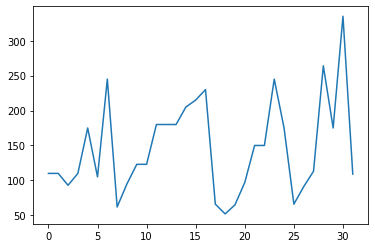

In [194]:
#import matplotlib
import matplotlib.pyplot  as plt

#see how hp varies with each car with line plot
y1 = cars['hp']
x  = range(len(cars['hp']))
plt.plot(x,y1)
plt.show()

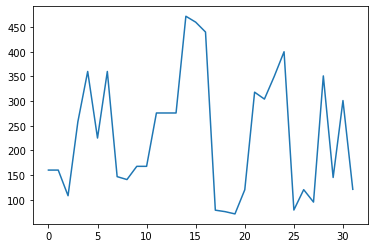

In [195]:
#import matplotlib
import matplotlib.pyplot  as plt
#see how hp varies with each car with line plot
y2 = cars['disp']
x  = range(len(cars['disp']))
plt.plot(x,y2)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


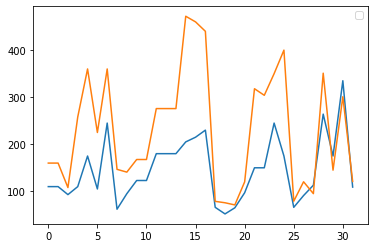

In [196]:
#import matplotlib
import matplotlib.pyplot  as plt
y1 = cars['hp']
y2 = cars['disp']
#see how both hp and disp varies 
x  = range(32)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend()

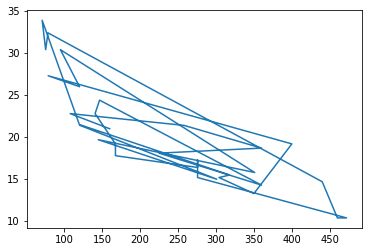

In [197]:
plt.plot(cars["disp"], cars["mpg"] )

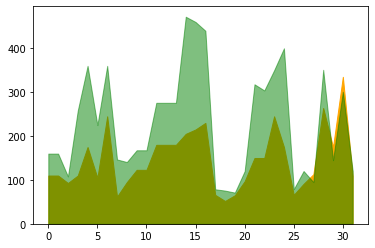

In [198]:
#import matplotlib
import matplotlib.pyplot  as plt
y1 = cars['hp']
y2 = cars['disp']
x  = range(32)
#area plot of hp and disp 
plt.stackplot(x,y1,alpha = 1, color='orange')
plt.stackplot(x,y2,alpha = 0.5, color='green')

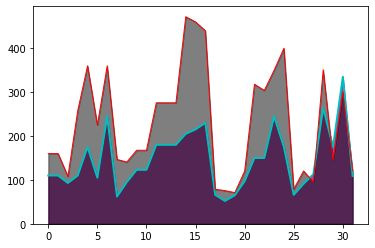

In [199]:
import matplotlib.pyplot  as plt
y1 = cars['hp']
y2 = cars['disp']
x  = range(32)
#plot both line plot and area plot to see the margin
plt.plot(x,y1, linewidth = 2.0, color = 'c')
plt.stackplot(x,y1,color = 'purple', alpha = 0.7)
plt.plot(x,y2, linewidth = 1.0, color = 'r')
plt.stackplot(x,y2,color = 'black', alpha = 0.5)

<BarContainer object of 32 artists>

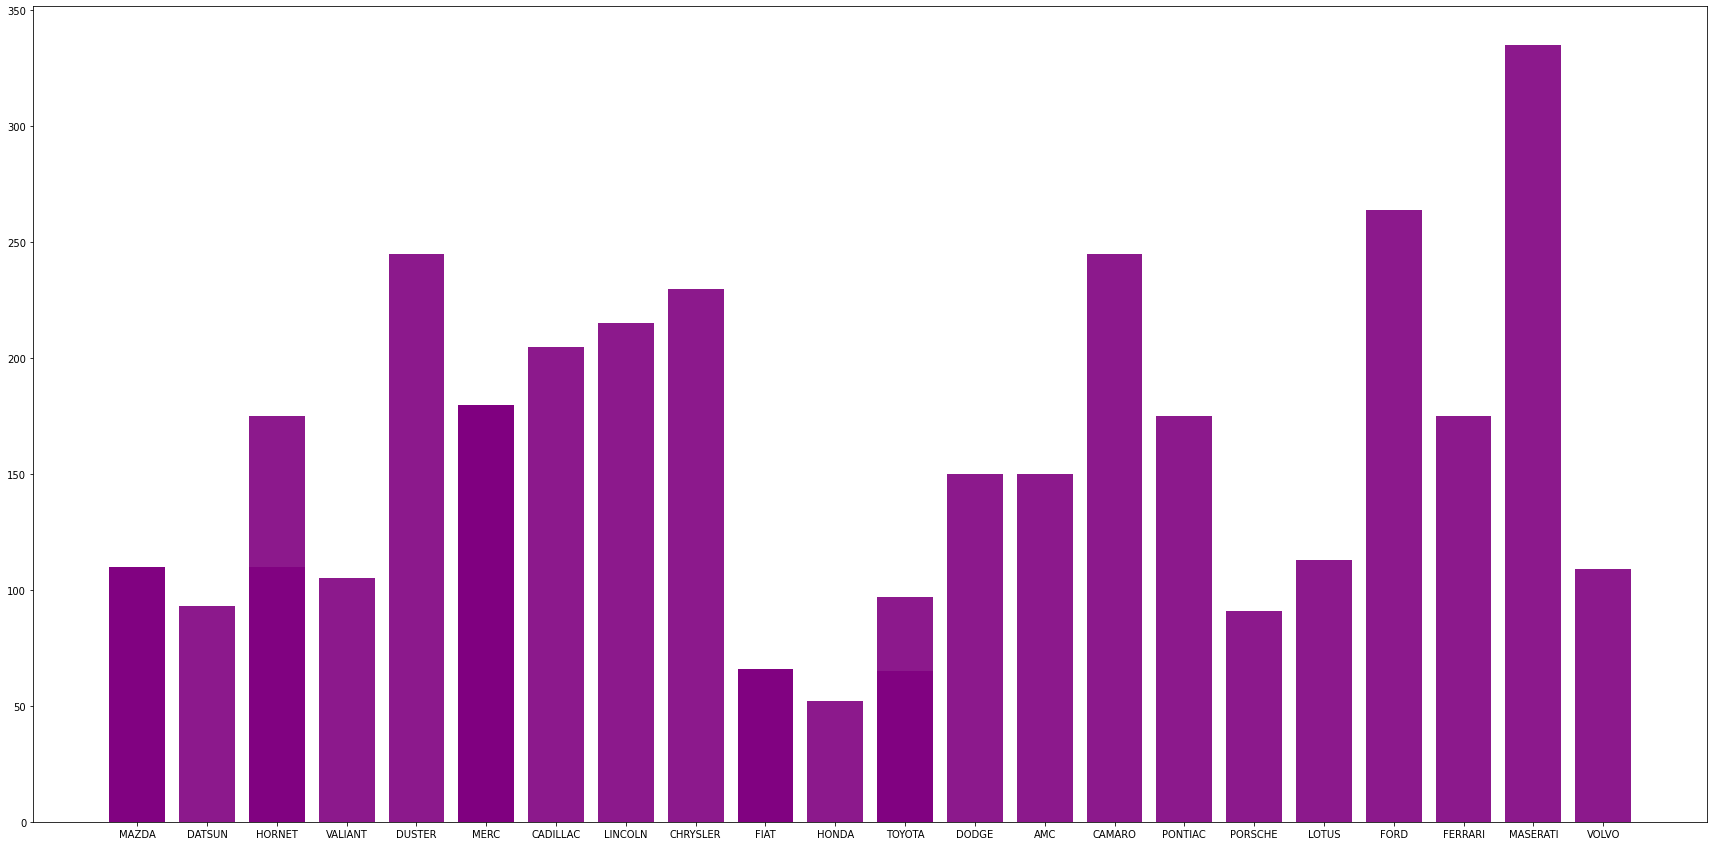

In [203]:
#import matplotlib
import matplotlib.pyplot  as plt
y = cars['hp']
x  = range(32)
#model to list
x1 = cars['brand'].tolist()
#adding figure to adjust figsize
fig = plt.figure(figsize = (30,15))
#see how hp changes with bar plot
plt.bar(x1,y,color="purple", alpha=0.9)

<BarContainer object of 32 artists>

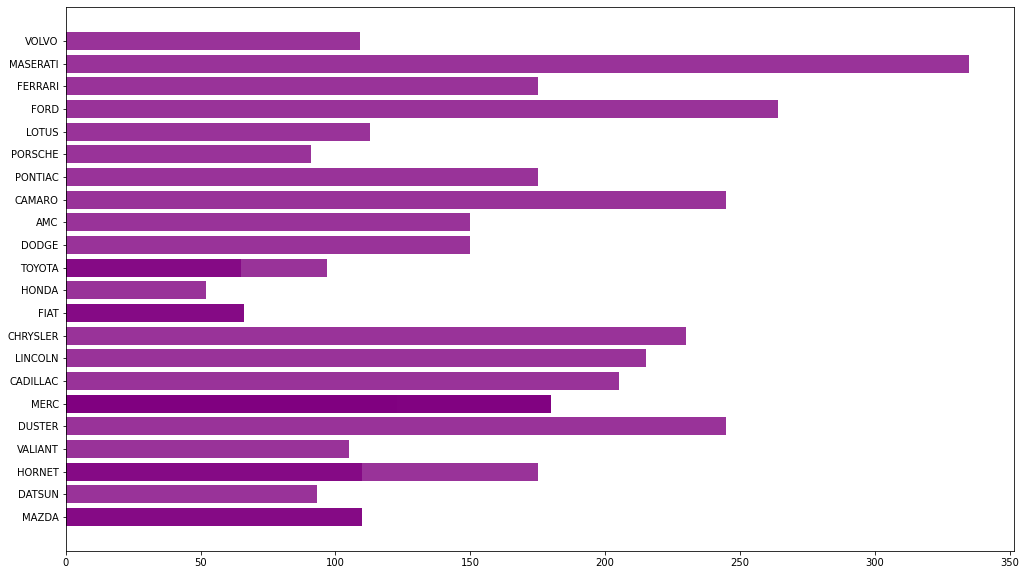

In [201]:
#import matplotlib
import matplotlib.pyplot  as plt
y = cars['hp']
x  = range(32)
x1 = cars['brand'].tolist()
fig = plt.figure(figsize = (17,10))
#to avoid the overlapping issue plot horizontal bar plot
plt.barh(x1,y, color="purple", alpha=0.8)